# Problem Statement: Don't Overfit 2

Giving a train data we need to correctly classiy our test data with maximum possible accuracy. The big challenge here is a very few set of data points which we have. Because of this problem our train data is able to generalize on test data set and it leading to overfitting. Hence, we need to overcome this challenge of overfitting and correctly classiy our test dataset.

Here the biggest challenge is very less number of datapoints. We have train data set with 250 data points and 300 features. In the test dataset we have 19750 data points. Hence, even with this small dataset we should be able to capture the information from the training dataset that should be able to classify our test dataset.

The features appear to be random. We will see their distribution in this case study before the modeling process. Let us try out with different models and see where we get the best results.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from IPython.display import Image

In [2]:
#importing our data
train_data = pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

print(train_data.head())
print(train_data.shape)

   id  target      0      1      2      3      4      5      6      7  ...  \
0   0     1.0 -0.098  2.165  0.681 -0.614  1.309 -0.455 -0.236  0.276  ...   
1   1     0.0  1.081 -0.973 -0.383  0.326 -0.428  0.317  1.172  0.352  ...   
2   2     1.0 -0.523 -0.089 -0.348  0.148 -0.022  0.404 -0.023 -0.172  ...   
3   3     1.0  0.067 -0.021  0.392 -1.637 -0.446 -0.725 -1.035  0.834  ...   
4   4     1.0  2.347 -0.831  0.511 -0.021  1.225  1.594  0.585  1.509  ...   

     290    291    292    293    294    295    296    297    298    299  
0  0.867  1.347  0.504 -0.649  0.672 -2.097  1.051 -0.414  1.038 -1.065  
1 -0.165 -1.695 -1.257  1.359 -0.808 -1.624 -0.458 -1.099 -0.936  0.973  
2  0.013  0.263 -1.222  0.726  1.444 -1.165 -1.544  0.004  0.800 -1.211  
3 -0.404  0.640 -0.595 -0.966  0.900  0.467 -0.562 -0.254 -0.533  0.238  
4  0.898  0.134  2.415 -0.996 -1.006  1.378  1.246  1.478  0.428  0.253  

[5 rows x 302 columns]
(250, 302)


We can see that our train data has 302 columns including id and target. In all we we 300 features from 0 to 299. With the help f these features we need to predict the target of our test_dataset. So, before we move further let us drop ids from train and test data set also store the class labels separately.

In [3]:
X_train_df = (train_data.drop(['id','target'],axis = 1))
X_test_df = (test_data.drop(['id'],axis = 1))

y_train = np.array(train_data['target'])

In [4]:
X_train=np.array(X_train_df)
X_test=np.array(X_test_df)

# EDA of our train dataset
So now as we have got our train and test dataset, it is time to do EDA o our train data and see what all features we have got and how are they distributed

In [5]:
describe_train=X_train_df.describe()
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,-0.036920,0.035448,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,0.963688,1.019689,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,-2.768000,-2.361000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,-0.689500,-0.643500,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,-0.012500,0.052000,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,0.635000,0.733000,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,2.512000,2.959000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


As we can see our features have both negative and positive values. We will now see the mean, max and min value of the mean, max , mean rows of our features which will give us an idea of the range in which our features are scattered.

In [6]:
min_value=min(describe_train.loc['min'])
max_value=max(describe_train.loc['max'])
mean_value=np.mean(describe_train.loc['mean'])

print('minimum value is  : '+str(min_value))
print('maximum value is  : '+str(max_value))
print('mean value is  : '+str(mean_value))

minimum value is  : -4.27
maximum value is  : 3.885
mean value is  : -0.0006210666666666641


The above result shows that the values of features lie between -4.27 to +3.885 and the mean roughly lies near zero. Hence, it might not be necessary to standardize our data. However if we don't get favourable results with our dataset we can go for it later on. Now, let us analyze the features of our dataset and see how are they representing our dataset.

# Check if Data is Balanced or Imbalanced

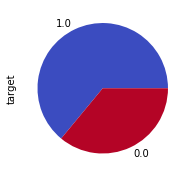

In [7]:
import matplotlib.pyplot as plt

train_data['target'].value_counts().plot(kind="pie", figsize=(5,3), colormap="coolwarm")

In [8]:
train_data['target'].value_counts()

1.0    160
0.0     90
Name: target, dtype: int64

From the above plot and results we can see that our dataset is imbalaced, where the number of labels of class one are almost twice as the number of labels of class1. Hence, we need to be careful with the same

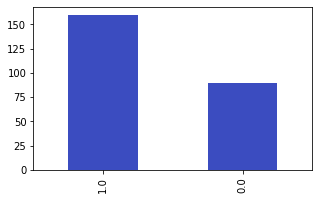

In [9]:
train_data['target'].value_counts().plot(kind="bar", figsize=(5,3), colormap="coolwarm")

Now let us do analysis of all the features and see their distribution. First we will plot histogram of all the features

It might not be the best practice to see the distribution of all features espcially when number of features are large. But as we don't have much information about data like from whih domain the data belongs to it is better to do so. So, based on the above graphs let us try to identify the features which are best in comparison with other related to the way the divide the two classes:

In [ ]:
import seaborn as sns

sns.set_style('whitegrid');
all_features = X_train_df.columns
#code reference-->https://pythonbasics.org/seaborn_pairplot/
for i in range(0,len(all_features),6):
    sns.pairplot(train_data,hue ='target',vars= [all_features[i],all_features[i+1],all_features[i+2],all_features[i+3]
                                                ,all_features[i+4],all_features[i+5]] ,size=4)
    plt.show()

'0','1','2','4','6','13','14','25','33','42','46','50','51','61','65','66','70','71','80','82','83','91','96','97','111','114','116','117','118','120','122','123','124','126','127','130','131','132','133','134','135','138','141','145','146','147','166','167','176','177','179','191','195','199','204','205','206','207','216','217','218','220','222','228','231','232','237','247','253','254','258','259','264','266','267','272','275','277','278','282','287','292','293','295','297','299'

The above set of features are based on observations from the graph. We can't rely on them completely. But after looking at them we got a rough idea that no such feature exists that could alone distunguish between the two class labels. Most of the part is overlapped although there lie few points that will help in distinguishing between the class labels for some of the features as listed above.

So, moving forward let us have a look at other distributions and see how the features are spread across our dataset.

# Mean of all features

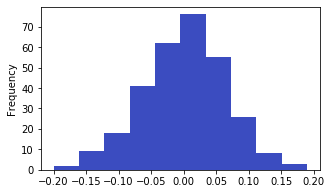

In [11]:
describe_train.loc['mean'].plot(kind="hist", figsize=(5,3), colormap="coolwarm")

From the above graph we can see that most of the poins have mean value in the range -0.05 to 0.05. Also all the mean values lie between range of -0.2 to 0.15. with a very few points on both the extremes. Seeing the curve we can say that the mean values kind of looks like normal distribution and all of them tend to be close to zero. 

# Minimum value Histogram

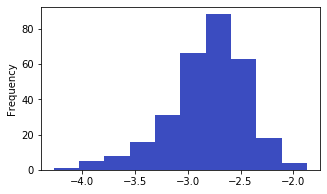

In [12]:
describe_train.loc['min'].plot(kind="hist", figsize=(5,3), colormap="coolwarm")

From the above graph we can see that most of the poins have minimum value in the range -3.2 to -2.7. Also all the minimum values lie between range of -4.5 to -2 with a very few points on both the extremes. Seeing the curve we can say that the mean values kind of looks like normal distribution.

# Maximum Value Histogram

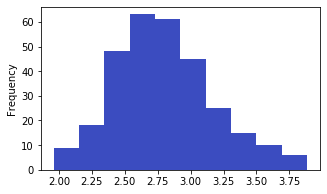

In [13]:
describe_train.loc['max'].plot(kind="hist", figsize=(5,3), colormap="coolwarm")

From the above graph we can see that most of the poins have maximum value in the range 2.5 to 3. Also all the maximum values lie between range of 2 to 4.5 with a very few points on both the extremes. Seeing the curve we can say that the maximum values kind of looks like normal distribution.

# 25th Percentile Histogram

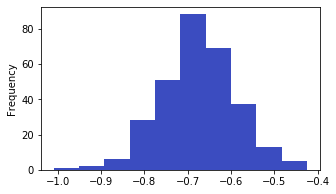

In [14]:
describe_train.loc['25%'].plot(kind="hist", figsize=(5,3), colormap="coolwarm")

From the above graph we can see that most of the poins have 25 percentile value in the range -0.75 to -0.6. Also all the 25 percentile values lie between range of -0.9 to -0.5 with a very few points on both the extremes. Seeing the curve we can say that the maximum values kind of looks like normal distribution also for all the features the 25% values are negative.

# 75% Percentile Histogram

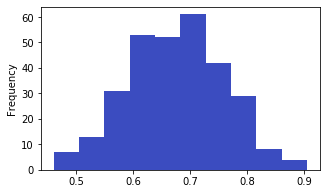

In [15]:
describe_train.loc['75%'].plot(kind="hist", figsize=(5,3), colormap="coolwarm")

From the above graph we can see that most of the poins have 75% value in the range  0.6 to 0.75. Also all the 75 percentile values lie between range of 0.4 to 0.9 with a very few points on both the extremes. Seeing the curve we can say that the 75% percentile values kind of looks like normal distribution. Also, all of them are positive.

# Standard Deviation

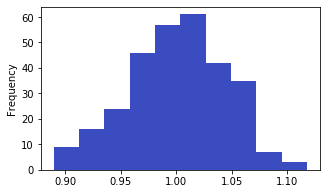

In [16]:
describe_train.loc['std'].plot(kind="hist", figsize=(5,3), colormap="coolwarm")

From all the above curves it is clear that the feature values tend to follow a normal distribution and are almost equally distrubuted both on the positive and negative side. So, let us start with training some models. We will first start with simple models and see how they perform on Kaggle. If the results are not promising with all the models we could later on try on with few selected features.

In [17]:
selected_features_eda=['0','1','2','4','6','13','14','25','33','42','46','50','51','61','65','66','70',
                       '71','80','82','83','91','96','97','111','114','116','117','118','120','122','123',
                       '124','126','127','130','131','132','133','134','135','138','141','145','146','147','166',
                       '167','176','177','179','191','195','199','204','205','206','207','216','217','218','220',
                       '222','228','231','232','237','247','253','254','258','259','264','266','267','272','275',
                       '277','278','282','287','292','293','295','297','299']
X_train_f=np.array(X_train_df[selected_features_eda])
X_test_f=np.array(X_test_df[selected_features_eda])
print(len(selected_features_eda))



86


In [18]:
submission = pd.read_csv('sample_submission.csv')


# Building Models

So, now as we have explored our data lets kick into the model building process. Let us first try with a simple model like logistic regresiion and see how it works for us. After that we can move on to different models. With so less training points we will follow corss validation process using Kfolds and then we can begin to our feature selection or oversampling or undersampling. Let us have a look at the Kfold processs

# KNN: RepeatedStratified KFold

In [19]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier


parameters = {'n_neighbors':[1,3,5,7,10,11,15,10,50,75,80,85,90,95,100]}
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=2652124)
clf = KNeighborsClassifier()

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 25 folds for each of 15 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s


Best Score:0.6959375
Best Parameters: {'n_neighbors': 80}


[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    3.6s finished


# KNN Repeated KFold

In [20]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier


parameters = {'n_neighbors':[1,3,5,7,10,11,15,10,50,75,80,85,90,95,100]}
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2652124)
clf = KNeighborsClassifier()

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 25 folds for each of 15 candidates, totalling 375 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


Best Score:0.697289921444113
Best Parameters: {'n_neighbors': 90}


[Parallel(n_jobs=-1)]: Done 375 out of 375 | elapsed:    1.4s finished


# KNN Training with Best Hyperparameters

In [28]:
from sklearn.metrics import roc_auc_score

clf = KNeighborsClassifier(n_neighbors = 80)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_train)
train_auc_knn1=roc_auc_score(y_train,y_pred)
submission['target'] = clf.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv', index=False)

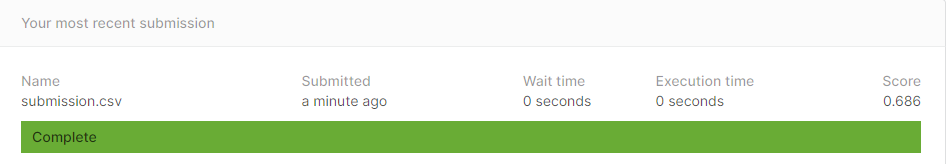

In [73]:
Image('subknn.png')

In [29]:
test_auc_knn1=0.686

KNN does not peform very well, lets see with logistic Regression

# RepeatedStratified KFold

In [31]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

parameters = {'penalty':['l1', 'l2'], 'C':[0.001,0.01,0.1,1,10],'solver':['liblinear'],'class_weight':['balanced',None]}

logreg = LogisticRegression()

rkf = RepeatedStratifiedKFold(n_repeats=10,random_state=42)

grid = GridSearchCV(estimator = logreg, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 50 folds for each of 20 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Score:0.7888194444444444
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.8s finished


# RepeatedKFold

In [32]:
from sklearn.model_selection import RepeatedKFold

parameters = {'penalty':['l1', 'l2'], 'C':[0.001,0.01,0.1,1,10],'solver':['liblinear'],'class_weight':['balanced',None]}

logreg = LogisticRegression()

rkf = RepeatedKFold(n_repeats=10,random_state=42)

grid = GridSearchCV(estimator = logreg, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train,y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))


Fitting 50 folds for each of 20 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Score:0.78571190642693
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    3.0s finished


# Training with Best Hyperprameters

In [34]:
logreg = LogisticRegression(C= 0.1, class_weight= 'balanced', penalty= 'l1', solver= 'liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
train_auc_lr = roc_auc_score(y_train,y_pred)
submission['target'] = logreg.predict_proba(X_test)[:,1]
submission.to_csv('submission.csv', index=False)

In [77]:
from IPython.display import Image

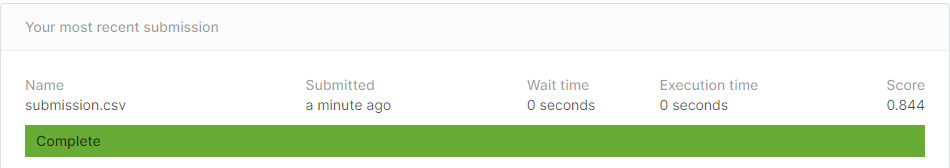

In [78]:
Image('sub1.png')

Kaggle Score = 0.844

In [35]:
test_auc_lr = 0.844

# Observations from above:

Logistic Regression performs far better than KNN. Let us see the impact of each on feature selection

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
all_features=list(X_train_df.columns)

# EDA Feature Selection:

In [43]:
selected_features_eda=['0','1','2','4','6','13','14','25','33','42','46','50','51','61','65','66','70',
                       '71','80','82','83','91','96','97','111','114','116','117','118','120','122','123',
                       '124','126','127','130','131','132','133','134','135','138','141','145','146','147','166',
                       '167','176','177','179','191','195','199','204','205','206','207','216','217','218','220',
                       '222','228','231','232','237','247','253','254','258','259','264','266','267','272','275',
                       '277','278','282','287','292','293','295','297','299']
eda_support = [True if feature in selected_features_eda else False for feature in all_features]

# Feature Selection Based on Pearson Correlation

In [44]:
#https://towardsdatascience.com/the-5-feature-selection-algorithms-every-data-scientist-need-to-know-3a6b566efd2

num_features=90

def select_cor_feature(X,y,num_features):
    all_features = list(X.columns)
    cor_list=[]
    
    
    for feature in all_features:
        cor = np.corrcoef(X[feature], y)[0,1]
        cor_list.append(cor)
        
    cor_list=[0 if np.isnan(i) else i for i in cor_list]
    
    
    selected_features = X.iloc[:,np.argsort(np.abs(cor_list))[-num_features:]].columns.tolist()
    pearson_support = [True if i in selected_features else False for i in all_features]
    selected_features = list(map(str,sorted(list(map(int,selected_features)))))
    
    return (pearson_support,selected_features)
    
    

In [45]:
pearson_support,selected_features_corr=select_cor_feature(X_train_df,y_train,64)
print('Features selected from pearson correlation are:')
print(selected_features_corr)

Features selected from pearson correlation are:
['0', '4', '13', '15', '16', '17', '24', '26', '30', '33', '39', '43', '63', '65', '73', '80', '82', '89', '90', '91', '98', '101', '105', '108', '114', '117', '119', '127', '129', '133', '134', '143', '148', '150', '151', '156', '164', '165', '176', '180', '183', '189', '194', '199', '201', '209', '214', '217', '220', '221', '226', '227', '230', '237', '239', '240', '244', '252', '258', '272', '276', '289', '295', '298']


# RFE Feature Selection

In [46]:
logreg= LogisticRegression()
selector = RFE(logreg, 100, step=1)
selector.fit(X_train,y_train)
rfe_support = list(selector.support_)

In [47]:
selected_features_rfe=[]

for i in range(len(rfe_support)):
    if rfe_support[i]==True:
        selected_features_rfe.append(all_features[i])

print('Features selected by Recursve feature elimination:')
print(selected_features_rfe)

Features selected by Recursve feature elimination:
['1', '4', '8', '9', '11', '13', '14', '15', '16', '17', '18', '20', '24', '28', '30', '33', '41', '43', '45', '46', '51', '52', '65', '66', '69', '70', '73', '78', '80', '82', '84', '90', '91', '94', '97', '98', '100', '101', '108', '111', '114', '116', '117', '127', '129', '132', '133', '134', '143', '145', '148', '149', '150', '151', '156', '161', '164', '165', '168', '171', '174', '176', '180', '183', '189', '192', '194', '198', '199', '201', '202', '209', '215', '217', '226', '227', '229', '230', '239', '241', '244', '246', '247', '252', '257', '258', '259', '262', '266', '268', '271', '276', '283', '285', '289', '291', '292', '295', '298', '299']


# Feature Selection with Chi-Sqared Method

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

num_features = 100

X_norm = MinMaxScaler().fit_transform(X_train_df)
chi_selector = SelectKBest(chi2, k=num_features)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
selected_features_chi = list(X_train_df.loc[:,chi_support].columns)

print('The selected features via Chi-Squared Method are:')
print(selected_features_chi)
print(str(len(selected_features_chi)), 'selected features')


The selected features via Chi-Squared Method are:
['0', '1', '4', '9', '13', '15', '16', '17', '24', '26', '30', '33', '39', '43', '45', '46', '52', '62', '63', '65', '70', '73', '80', '82', '89', '90', '91', '94', '95', '98', '101', '104', '105', '107', '108', '114', '117', '119', '127', '129', '133', '134', '137', '143', '144', '148', '150', '151', '156', '163', '164', '165', '168', '176', '179', '180', '182', '183', '189', '193', '194', '198', '199', '201', '209', '214', '215', '217', '220', '226', '227', '228', '229', '230', '237', '239', '240', '241', '243', '244', '246', '251', '252', '253', '258', '262', '267', '268', '272', '276', '280', '281', '283', '285', '287', '288', '289', '292', '295', '298']
100 selected features


# Feature Selection with Lasso:

Lasso regression uses L1 regularization. With the help of L1 regularization sparsity is created which helped in removing unwanted features. We will use the same here to detect the best feature from out dataset.

In [49]:
from sklearn.feature_selection import SelectFromModel

num_features = 100

lasso_selector = SelectFromModel(LogisticRegression(penalty='l1',solver='liblinear'),max_features = num_features)
lasso_selector.fit(X_train,y_train)
lasso_support = lasso_selector.get_support()
selected_features_lasso = list(X_train_df.loc[:,lasso_support].columns)

print('The selected features via Lasso Regression Method are:')
print(selected_features_lasso)
print(str(len(selected_features_lasso)), 'selected features')




The selected features via Lasso Regression Method are:
['1', '4', '9', '11', '13', '15', '16', '17', '18', '24', '30', '33', '39', '42', '43', '45', '46', '50', '51', '52', '63', '65', '67', '69', '72', '73', '78', '79', '80', '82', '89', '90', '91', '94', '95', '98', '100', '101', '108', '111', '114', '117', '127', '129', '130', '132', '133', '134', '143', '145', '147', '148', '149', '150', '156', '160', '165', '168', '171', '174', '176', '183', '189', '192', '194', '198', '199', '201', '206', '209', '211', '217', '221', '227', '229', '230', '237', '239', '244', '246', '247', '249', '257', '258', '259', '261', '262', '271', '272', '276', '279', '285', '288', '291', '292', '293', '294', '295', '298', '299']
100 selected features


# Feature Selection Using Tree Method

Without a fixed random state our extra tree classifer will give us a different set of features each time. So, let us take advatnage of this and run it for multiple iteratons. Then we will have most probablr features with us.

In [50]:
from sklearn.ensemble import ExtraTreesClassifier

selected_features_ext=[]
for j in range(10):
    clf = ExtraTreesClassifier()
    clf.fit(X_train,y_train)
    selected_features_tree=list(clf.feature_importances_)
    for i in range(len(selected_features_eda)):
        j =selected_features_tree.index(max(selected_features_tree))
        selected_features_ext.append(all_features[j])
        selected_features_tree.remove(selected_features_tree[j])
        

selected_features_ext=list(set(selected_features_ext))
selected_features_ext=list(map(str,sorted(list(map(int,selected_features_ext)))))
support_tree = [True if i in selected_features_ext else False for i in all_features]
print(selected_features_ext)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '23', '24', '25', '26', '27', '28', '29', '30', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '16

# Seeing Features Together from all 6 Methods

In [51]:
all_features_df = pd.DataFrame({'Feature':all_features,'Pearson_Correlation':pearson_support,
                              'RFE':rfe_support,'EDA':eda_support,'Tree_Method':support_tree,'Lasso':lasso_support})

all_features_df['Total']=np.sum(all_features_df,axis=1)
all_features_df = all_features_df.sort_values(['Total','Feature'] , ascending=False)
all_features_df.index = range(1, len(all_features_df)+1)
print('Displaying the top 50 features')
all_features_df.head(50)

Displaying the top 50 features


,Feature,Pearson_Correlation,Chi-2,RFE,EDA,Tree_Method,Lasso,Total
1,91,True,True,True,True,True,True,6
2,82,True,True,True,True,True,True,6
3,80,True,True,True,True,True,True,6
4,65,True,True,True,True,True,True,6
5,4,True,True,True,True,True,True,6
6,33,True,True,True,True,True,True,6
7,258,True,True,True,True,True,True,6
8,217,True,True,True,True,True,True,6
9,199,True,True,True,True,True,True,6
10,176,True,True,True,True,True,True,6


So, let us take top10, top 20, top50 and top 70 features and then do hyperparamter tuning with each of them to see how our model is performing

# Selecting the Top Features:

In [52]:
top_10_features = list(all_features_df[:11]['Feature'])
print('The top 10 features are')
print(top_10_features)
print('-'*50)

top_20_features = list(all_features_df[:21]['Feature'])
print('The top 20 features are')
print(top_20_features)
print('-'*50)

top_50_features = list(all_features_df[:51]['Feature'])
print('The top 50 features are')
print(top_50_features)
print('-'*50)

top_70_features = list(all_features_df[:71]['Feature'])
print('The top 70 features are')
print(top_70_features)
print('-'*50)

top_100_features = list(all_features_df[:101]['Feature'])
print('The top 100 features are')
print(top_100_features)
print('-'*50)

The top 10 features are
['91', '82', '80', '65', '4', '33', '258', '217', '199', '176', '134']
--------------------------------------------------
The top 20 features are
['91', '82', '80', '65', '4', '33', '258', '217', '199', '176', '134', '133', '13', '127', '117', '114', '98', '90', '73', '46', '43']
--------------------------------------------------
The top 50 features are
['91', '82', '80', '65', '4', '33', '258', '217', '199', '176', '134', '133', '13', '127', '117', '114', '98', '90', '73', '46', '43', '30', '295', '292', '244', '24', '230', '209', '201', '194', '189', '183', '17', '165', '16', '156', '150', '15', '148', '143', '129', '108', '101', '1', '94', '89', '70', '63', '52', '51', '45']
--------------------------------------------------
The top 70 features are
['91', '82', '80', '65', '4', '33', '258', '217', '199', '176', '134', '133', '13', '127', '117', '114', '98', '90', '73', '46', '43', '30', '295', '292', '244', '24', '230', '209', '201', '194', '189', '183', '17'

In [53]:
submission=pd.read_csv('submission.csv')

# Hyperparameter Tuning of Selected Features One by One

# KNN TOP 50 Features

In [54]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors':[1,3,10,30,75,80,85,90,100,120,125,130,135,150]}

clf = KNeighborsClassifier()

rkf = RepeatedStratifiedKFold(n_repeats=10,random_state=42)

grid = GridSearchCV(estimator = clf, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_df[top_50_features],y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 50 folds for each of 14 candidates, totalling 700 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s


Best Score:0.916892361111111
Best Parameters: {'n_neighbors': 125}


[Parallel(n_jobs=-1)]: Done 700 out of 700 | elapsed:    3.6s finished


# Kaggle Score top 50 Features

In [56]:
clf = KNeighborsClassifier(n_neighbors = 125)
clf.fit(X_train_df[top_50_features],y_train)
y_pred = clf.predict(X_train_df[top_50_features])
train_auc_knn2=roc_auc_score(y_train,y_pred)
submission['target'] = clf.predict_proba(X_test_df[top_50_features])[:,1]
submission.to_csv('submission.csv', index=False)

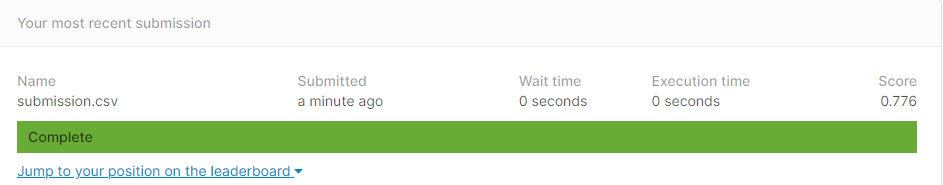

In [57]:
Image('subknn2.png')

In [58]:
test_auc_knn2=0.776

Hence, KNN performs bettwer with lesser features. Hence, not all the features are useful This also explains why L1 regulairzation was chosen while hyperparameter tuning for logisticregression

# Hyperparameter Tuning for LogisticRegression

# Logistic Regression Top 10 Features

In [59]:
from sklearn.model_selection import RepeatedStratifiedKFold

parameters = {'penalty':['l1', 'l2'], 'C':[0.001,0.01,0.1,1,10],'solver':['liblinear'],'class_weight':['balanced',None]}

logreg = LogisticRegression()

rkf = RepeatedStratifiedKFold(n_repeats=10,random_state=42)

grid = GridSearchCV(estimator = logreg, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_df[top_10_features],y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Score:0.8489930555555556
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.8s finished


# Kaggle Submission with top 10 Features Logistic Regression

In [60]:
logreg = LogisticRegression(C= 0.01, class_weight='balanced', penalty= 'l2', solver= 'liblinear')
logreg.fit(X_train_df[top_10_features],y_train)
y_pred=logreg.predict(X_train_df[top_10_features])
train_auc_lr2=roc_auc_score(y_train,y_pred)
submission['target'] = logreg.predict_proba(X_test_df[top_10_features])[:,1]
submission.to_csv('submission.csv', index=False)

Kaggle Score = 0.791

In [61]:
test_auc_lr2=0.791

# Logistic Regression Top 50 Features

In [62]:
from sklearn.model_selection import RepeatedStratifiedKFold

parameters = {'penalty':['l1', 'l2'], 'C':[0.0001,0.001,0.01,0.1,1,10],'solver':['liblinear'],'class_weight':['balanced',None]}

logreg = LogisticRegression()

rkf = RepeatedStratifiedKFold(n_repeats=10,random_state=42)

grid = GridSearchCV(estimator = logreg, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_df[top_50_features],y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 50 folds for each of 24 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Score:0.9311111111111111
Best Parameters: {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    2.2s finished


# Kaggle Submission with top 50 Features

In [64]:
logreg = LogisticRegression(C= 0.01, class_weight='balanced', penalty= 'l2', solver= 'liblinear')
logreg.fit(X_train_df[top_50_features],y_train)
y_pred=logreg.predict(X_train_df[top_50_features])
train_auc_lr3=roc_auc_score(y_train,y_pred)
submission['target'] = logreg.predict_proba(X_test_df[top_50_features])[:,1]
submission.to_csv('submission.csv', index=False)

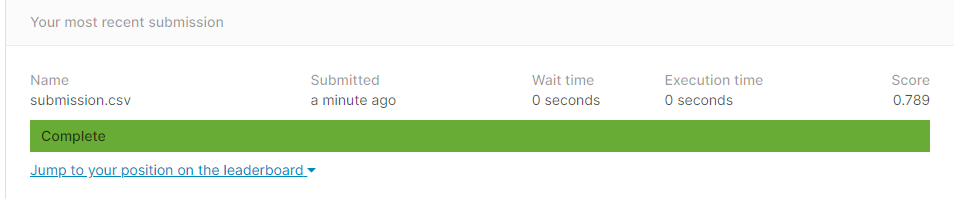

In [96]:
Image('sub2.png')

In [65]:
test_auc_lr3=0.789

# Logistic Regression TOP 70 Features

In [97]:
from sklearn.model_selection import RepeatedStratifiedKFold

parameters = {'penalty':['l1', 'l2'], 'C':[0.001,0.01,0.1,1,10],'solver':['liblinear'],'class_weight':['balanced',None]}

logreg = LogisticRegression()

rkf = RepeatedStratifiedKFold(n_repeats=10,random_state=42)

grid = GridSearchCV(estimator = logreg, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_df[top_70_features],y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s


Best Score:0.9440277777777776
Best Parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    2.2s finished


# Kaggle Score with Top 70 features

In [98]:
logreg = LogisticRegression(C= 0.01, class_weight='balanced', penalty= 'l2', solver= 'liblinear')
logreg.fit(X_train_df[top_70_features],y_train)
submission['target'] = logreg.predict_proba(X_test_df[top_70_features])[:,1]
submission.to_csv('submission.csv', index=False)

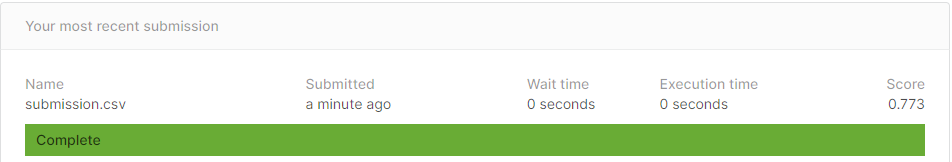

In [104]:
KaggleScore = 0.773
Image('sub3.png')

# Logistic Regression Top 100 Features

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold

parameters = {'penalty':['l1', 'l2'], 'C':[0.001,0.01,0.1,1,10,20,50,100],'solver':['liblinear'],'class_weight':['balanced',None]}

logreg = LogisticRegression()

rkf = RepeatedStratifiedKFold(n_repeats=10,random_state=42)

grid = GridSearchCV(estimator = logreg, param_grid = parameters , scoring = 'roc_auc', verbose = 1, n_jobs = -1,cv=rkf)
grid.fit(X_train_df[top_100_features],y_train)

print("Best Score:" + str(grid.best_score_))
print("Best Parameters: " + str(grid.best_params_))

Fitting 50 folds for each of 32 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    3.4s


Best Score:0.958923611111111
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:    4.6s finished


# Kaggle Score Top 100 Features

In [68]:
logreg = LogisticRegression(C= 0.1, class_weight='balanced', penalty= 'l2', solver= 'liblinear')
logreg.fit(X_train_df[top_100_features],y_train)
y_pred = logreg.predict(X_train_df[top_100_features])
train_auc_lr4=roc_auc_score(y_train,y_pred)
submission['target'] = logreg.predict_proba(X_test_df[top_100_features])[:,1]
submission.to_csv('submission.csv', index=False)

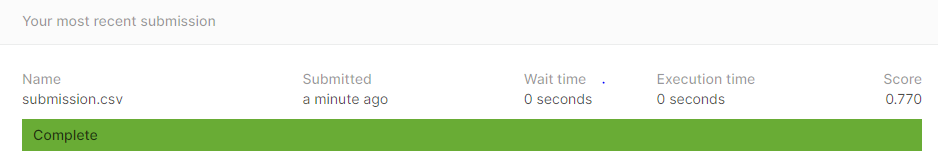

In [105]:
KaggleScore = 0.508
Image('sub4.png')

In [69]:
test_auc_lr4=0.770

Even after feature selction our LogisticRegression performs better with all the features with L1 regulairzation and we get 84.4% accuracy which is pretty good.

# Observation:

After all the above finding we can conclude that our model performs best with Logisitci Regression as it is a simply model that best separtes two classes. Also, regularization helped in removig the overfitting.

Hence, the best suited model for our dataset is Logisticregression with L1 regularization. This implies we could also use Lasso regression for the same. This model gives 84.4 % auc score with a simple parameter tuning. Hence, it is the best model to avoid overfitting in such scenarios.

In [2]:
!pip install prettytable

  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13704 sha256=c449d488e80e75c2a3f7e1c5306eab7527bb8d0990501432b5be6e9300745ae0
  Stored in directory: c:\users\mansi.choudhary\appdata\local\pip\cache\wheels\8c\76\0b\eb9eb3da7e2335e3577e3f96a0ae9f74f206e26457bd1a2bc8
Successfully built prettytable


In [72]:
import prettytable
import math

x=prettytable.PrettyTable()


x.field_names = ["Classifier_Name", "Number_of_Features", "Train_Auc_Score", "Test_Auc_Score",'Summary']

x.add_row(["KNN", 300, train_auc_knn1, test_auc_knn1,"No overfitting but less acuurate"])
x.add_row(["Logistic Regression", 300, train_auc_lr, test_auc_lr,"Works well and gives good result"])
x.add_row(["KNN", 50, train_auc_knn2, test_auc_knn2,"Performing better with less features"])
x.add_row(["Logistic Regression", 10, train_auc_lr2, test_auc_lr2,"Performs same on train and test"])
x.add_row(["Logistic Regression", 50, train_auc_lr3, test_auc_lr3,"Slightly overfitting"])
x.add_row(["Logistic Regression", 100, train_auc_lr4,test_auc_lr4,"Badly Overfits"])


print(x)

+---------------------+--------------------+--------------------+----------------+--------------------------------------+
|   Classifier_Name   | Number_of_Features |  Train_Auc_Score   | Test_Auc_Score |               Summary                |
+---------------------+--------------------+--------------------+----------------+--------------------------------------+
|         KNN         |        300         | 0.5111111111111111 |     0.686      |   No overfitting but less acuurate   |
| Logistic Regression |        300         | 0.8951388888888888 |     0.844      |   Works well and gives good result   |
|         KNN         |         50         | 0.5166666666666666 |     0.776      | Performing better with less features |
| Logistic Regression |         10         | 0.7989583333333333 |     0.791      |   Performs same on train and test    |
| Logistic Regression |         50         |      0.921875      |     0.789      |         Slightly overfitting         |
| Logistic Regression | 